## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Network Traffic
**Steps**:
1. Extract Features from Dataset:
    - Load `network_traffic.csv` .
2. Isolation Forest Model
3. Display Anomalies

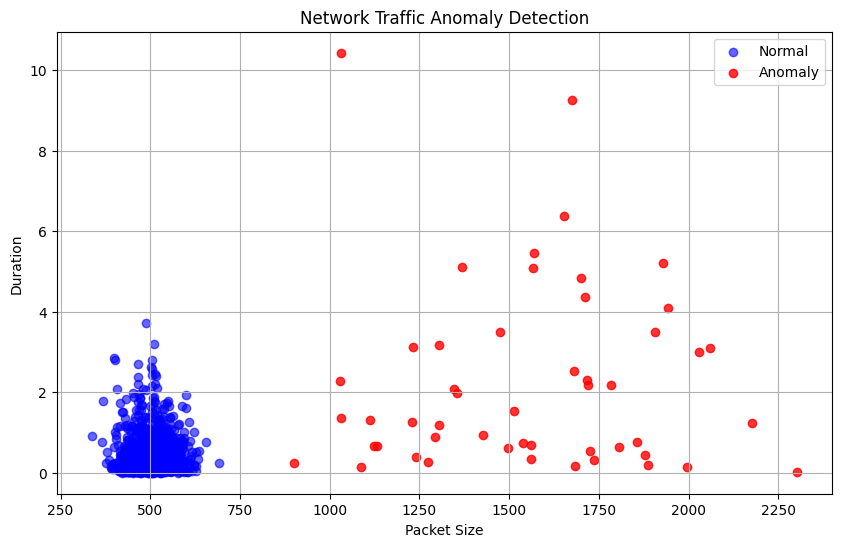

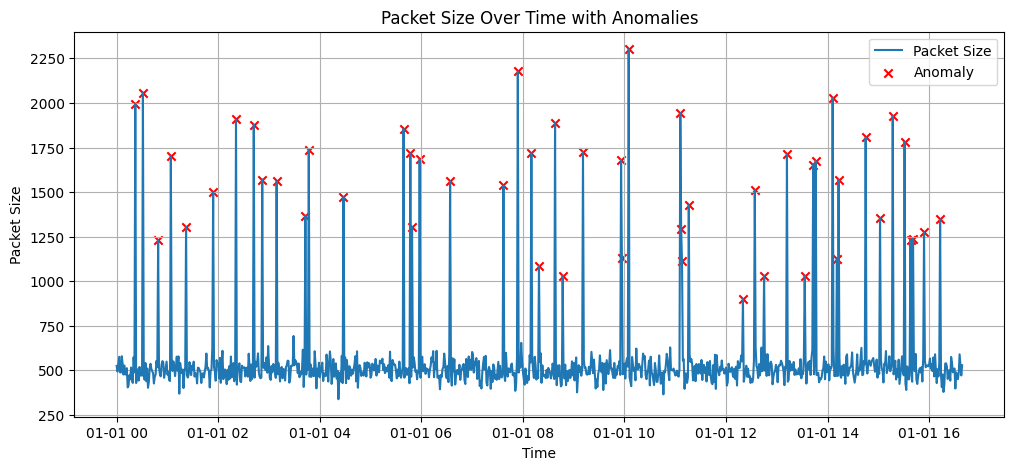

✅ Anomaly detection complete.
Total anomalies found: 50


In [1]:
# write your code from here# Ques_4: Anomaly Detection in Network Traffic using Isolation Forest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# ---------------------------
# 1. Generate synthetic network traffic data
# ---------------------------
def generate_network_data(n_samples=1000, seed=42):
    np.random.seed(seed)
    
    timestamps = pd.date_range(start="2025-01-01", periods=n_samples, freq='T')
    
    packet_size = np.random.normal(loc=500, scale=50, size=n_samples)
    duration = np.random.exponential(scale=0.5, size=n_samples)
    connection_count = np.random.poisson(lam=10, size=n_samples)
    
    # Inject anomalies
    anomaly_indices = np.random.choice(n_samples, size=50, replace=False)
    packet_size[anomaly_indices] *= np.random.uniform(2, 4, size=50)
    duration[anomaly_indices] *= np.random.uniform(3, 6, size=50)
    connection_count[anomaly_indices] += np.random.randint(20, 100, size=50)
    
    df = pd.DataFrame({
        'timestamp': timestamps,
        'packet_size': packet_size,
        'duration': duration,
        'connection_count': connection_count
    })
    
    return df

# ---------------------------
# 2. Apply Isolation Forest for anomaly detection
# ---------------------------
def detect_anomalies(df, contamination=0.05):
    features = ['packet_size', 'duration', 'connection_count']
    model = IsolationForest(n_estimators=100, contamination=contamination, random_state=42)
    df['anomaly'] = model.fit_predict(df[features])
    return df

# ---------------------------
# 3. Plotting results
# ---------------------------
def plot_network_anomalies(df):
    normal = df[df['anomaly'] == 1]
    anomalous = df[df['anomaly'] == -1]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(normal['packet_size'], normal['duration'], color='blue', alpha=0.6, label='Normal')
    plt.scatter(anomalous['packet_size'], anomalous['duration'], color='red', alpha=0.8, label='Anomaly')
    plt.xlabel("Packet Size")
    plt.ylabel("Duration")
    plt.title("Network Traffic Anomaly Detection")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(12, 5))
    plt.plot(df['timestamp'], df['packet_size'], label='Packet Size')
    plt.scatter(anomalous['timestamp'], anomalous['packet_size'], color='red', marker='x', label='Anomaly')
    plt.title("Packet Size Over Time with Anomalies")
    plt.xlabel("Time")
    plt.ylabel("Packet Size")
    plt.legend()
    plt.grid(True)
    plt.show()

# ---------------------------
# 4. Main Execution
# ---------------------------
def main():
    df = generate_network_data()
    df = detect_anomalies(df)
    plot_network_anomalies(df)
    
    print("✅ Anomaly detection complete.")
    print("Total anomalies found:", (df['anomaly'] == -1).sum())

# ---------------------------
# Run the main function
# ---------------------------
if __name__ == "__main__":
    main()
